# Import libraries and mount drive

In [1]:
import numpy as np
#import pandas as pd
import os
import glob
#import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path
import re
import requests
from io import StringIO
import random
import pdb

import matplotlib
matplotlib.use('agg')  # allows notebook to be tested in Travis

import pandas as pd
#import cartopy.crs as ccrs
#import cartopy
import matplotlib.pyplot as plt
#import pandana as pdna
import time

!pip install pandana
import pandana as pdna

# !pip install cartopy
# import cartopy.crs as ccrs
# import cartopy

!pip install urbanaccess
import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data to an Urban Access transit data object

In [ ]:
#feeds.to_dict()

In [3]:
# I manually add all the feeds from the bus transit companies of Gipuzkoa

feeds.add_feed(add_dict={'dbus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/dbus/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_areizaga/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_arrasate/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_auif_urb': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_auif_urb/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_eibar': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_eibar/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_ekialdebus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_ekialdebus/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_euskotren_bus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_euskotren_bus/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_garayar': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_garayar/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_gipuzkoana': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_gipuzkoana/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_goierrialdea': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_goierrialdea/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_hernani': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_hernani/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_lasarte': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_lasarte/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_oiartzun': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_oiartzun/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_pesa': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_pesa/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_renteria': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_renteria/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_tbh': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_tbh/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_tolosaldea': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_tolosaldea/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_tsst': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_tsst/google_transit.zip'})
feeds.add_feed(add_dict={'lurraldebus_zarautz': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_zarautz/google_transit.zip'})

INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'dbus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/dbus/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_areizaga/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_arrasate/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_auif_urb': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_auif_urb/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_eibar': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_eibar/google_transit.zip'}
INFO:urbanaccess:Added 1 feeds to gtfs_feeds: {'lurraldebus_eki

Added 1 feeds to gtfs_feeds: {'dbus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/dbus/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_areizaga': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_areizaga/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_arrasate': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_arrasate/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_auif_urb': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_auif_urb/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_eibar': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebus_eibar/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'lurraldebus_ekialdebus': 'https://www.geo.euskadi.eus/cartografia/DatosDescarga/Transporte/Moveuskadi/ATTG/lurraldebu

In [4]:
# I download all these feeds, 40sg
gtfsfeeds.download()

INFO:urbanaccess:data/gtfsfeed_zips does not exist. Directory was created
INFO:urbanaccess:19 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips


data/gtfsfeed_zips does not exist. Directory was created
19 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips


INFO:urbanaccess:dbus GTFS feed downloaded successfully. Took 8.34 seconds for 4,162,404.0KB


dbus GTFS feed downloaded successfully. Took 8.34 seconds for 4,162,404.0KB


INFO:urbanaccess:lurraldebus_areizaga GTFS feed downloaded successfully. Took 1.76 seconds for 175,056.0KB


lurraldebus_areizaga GTFS feed downloaded successfully. Took 1.76 seconds for 175,056.0KB


INFO:urbanaccess:lurraldebus_arrasate GTFS feed downloaded successfully. Took 1.25 seconds for 56,477.0KB


lurraldebus_arrasate GTFS feed downloaded successfully. Took 1.25 seconds for 56,477.0KB


INFO:urbanaccess:lurraldebus_auif_urb GTFS feed downloaded successfully. Took 1.23 seconds for 177.0KB


lurraldebus_auif_urb GTFS feed downloaded successfully. Took 1.23 seconds for 177.0KB


INFO:urbanaccess:lurraldebus_eibar GTFS feed downloaded successfully. Took 1.40 seconds for 61,236.0KB


lurraldebus_eibar GTFS feed downloaded successfully. Took 1.40 seconds for 61,236.0KB


INFO:urbanaccess:lurraldebus_ekialdebus GTFS feed downloaded successfully. Took 2.52 seconds for 1,498,262.0KB


lurraldebus_ekialdebus GTFS feed downloaded successfully. Took 2.52 seconds for 1,498,262.0KB


INFO:urbanaccess:lurraldebus_euskotren_bus GTFS feed downloaded successfully. Took 1.35 seconds for 250.0KB


lurraldebus_euskotren_bus GTFS feed downloaded successfully. Took 1.35 seconds for 250.0KB


INFO:urbanaccess:lurraldebus_garayar GTFS feed downloaded successfully. Took 1.75 seconds for 398,196.0KB


lurraldebus_garayar GTFS feed downloaded successfully. Took 1.75 seconds for 398,196.0KB


INFO:urbanaccess:lurraldebus_gipuzkoana GTFS feed downloaded successfully. Took 2.84 seconds for 960,175.0KB


lurraldebus_gipuzkoana GTFS feed downloaded successfully. Took 2.84 seconds for 960,175.0KB


INFO:urbanaccess:lurraldebus_goierrialdea GTFS feed downloaded successfully. Took 2.61 seconds for 1,153,295.0KB


lurraldebus_goierrialdea GTFS feed downloaded successfully. Took 2.61 seconds for 1,153,295.0KB


INFO:urbanaccess:lurraldebus_hernani GTFS feed downloaded successfully. Took 1.23 seconds for 44,208.0KB


lurraldebus_hernani GTFS feed downloaded successfully. Took 1.23 seconds for 44,208.0KB


INFO:urbanaccess:lurraldebus_lasarte GTFS feed downloaded successfully. Took 1.52 seconds for 27,179.0KB


lurraldebus_lasarte GTFS feed downloaded successfully. Took 1.52 seconds for 27,179.0KB


INFO:urbanaccess:lurraldebus_oiartzun GTFS feed downloaded successfully. Took 1.07 seconds for 12,611.0KB


lurraldebus_oiartzun GTFS feed downloaded successfully. Took 1.07 seconds for 12,611.0KB


INFO:urbanaccess:lurraldebus_pesa GTFS feed downloaded successfully. Took 1.39 seconds for 0.0KB


lurraldebus_pesa GTFS feed downloaded successfully. Took 1.39 seconds for 0.0KB


INFO:urbanaccess:lurraldebus_renteria GTFS feed downloaded successfully. Took 3.68 seconds for 121,102.0KB


lurraldebus_renteria GTFS feed downloaded successfully. Took 3.68 seconds for 121,102.0KB


INFO:urbanaccess:lurraldebus_tbh GTFS feed downloaded successfully. Took 2.47 seconds for 1,054,719.0KB


lurraldebus_tbh GTFS feed downloaded successfully. Took 2.47 seconds for 1,054,719.0KB


INFO:urbanaccess:lurraldebus_tolosaldea GTFS feed downloaded successfully. Took 2.22 seconds for 587,957.0KB


lurraldebus_tolosaldea GTFS feed downloaded successfully. Took 2.22 seconds for 587,957.0KB


INFO:urbanaccess:lurraldebus_tsst GTFS feed downloaded successfully. Took 1.94 seconds for 691,633.0KB


lurraldebus_tsst GTFS feed downloaded successfully. Took 1.94 seconds for 691,633.0KB


INFO:urbanaccess:lurraldebus_zarautz GTFS feed downloaded successfully. Took 1.74 seconds for 97,201.0KB
INFO:urbanaccess:GTFS feed download completed. Took 42.36 seconds
INFO:urbanaccess:data/gtfsfeed_text does not exist. Directory was created


lurraldebus_zarautz GTFS feed downloaded successfully. Took 1.74 seconds for 97,201.0KB
GTFS feed download completed. Took 42.36 seconds
data/gtfsfeed_text does not exist. Directory was created


BadZipFile: ignored

Let's specify a bounding box of coordinates for Gipuzkoa to subset the GTFS data to. You can generate a bounding box by going to http://boundingbox.klokantech.com/ and selecting the CSV format.

In [ ]:
# Load GTFS data into an UrbanAcess transit data object
# trips = pd.read_csv('/content/drive/MyDrive/CS Gipuzkoa/Data/Gipuzkoa_no_NaNs.csv')
validation = True
verbose = True
# bbox for Gipuzkoa
Lat_min = 42.904155
Long_min = -2.621987
Lat_max = 43.403070
Long_max = -1.740334
bbox = (Long_min,Lat_min,Long_max,Lat_max,)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

INFO:urbanaccess:Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.


Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.


INFO:urbanaccess:GTFS text file header whitespace check completed. Took 0.28 seconds
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_hernani
INFO:urbanaccess:The unique agency id: lurraldebus_urbano_de_hernani was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_hernani GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_zarautz
INFO:urbanaccess:The unique agency 

GTFS text file header whitespace check completed. Took 0.28 seconds
--------------------------------
Processing GTFS feed: lurraldebus_hernani
The unique agency id: lurraldebus_urbano_de_hernani was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_hernani GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_zarautz
The unique agency id: zarauzko_hiribusa was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be 

INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_tbh
INFO:urbanaccess:The unique agency id: lurraldebus_interurbano_tolosa_buruntzaldea was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_tbh GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_tbh
The unique agency id: lurraldebus_interurbano_tolosa_buruntzaldea was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_tbh GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_gipuzkoana
INFO:urbanaccess:The unique agency id: lurraldebus_autobuses_la_guipuzcoana_s.l. was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_gipuzkoana GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------


Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_gipuzkoana
The unique agency id: lurraldebus_autobuses_la_guipuzcoana_s.l. was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_gipuzkoana GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------


INFO:urbanaccess:Processing GTFS feed: lurraldebus_tsst
INFO:urbanaccess:The unique agency id: lurraldebus_cia_tranvia_de_tolosa was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_tsst GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_areizaga
INFO:urbanaccess:The unique agency id: lurraldebus_hijos_de_antonio_areizaga_s.a. was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Uniqu

Processing GTFS feed: lurraldebus_tsst
The unique agency id: lurraldebus_cia_tranvia_de_tolosa was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_tsst GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_areizaga
The unique agency id: lurraldebus_hijos_de_antonio_areizaga_s.a. was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_areizaga GTFS feed stops: co

INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_arrasate
INFO:urbanaccess:The unique agency id: lurraldebus_urbano_de_arrasate was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_arrasate GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_oiartzun
INFO:urbanacces

Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_arrasate
The unique agency id: lurraldebus_urbano_de_arrasate was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_arrasate GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_oiartzun
The unique agency id: lurraldebus_autobuses_cuadra_s.a. was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stop

INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_pesa
INFO:urbanaccess:The unique agency id: lurraldebus_transportes_pesa_s.a. was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:Records:
INFO:urbanaccess:    stop_id  stop_code                                       stop_name  \
0      4323        NaN                        Vi-Estacion De Autobuses   
1      4324        NaN                                          Durana   
2      4325        NaN  Carretera A-3002. Direccion Arrasate-Mondragon   
27       60        NaN                               Aeropuerto Bilbao   
82     4314        NaN                        Bilboko Autobus Geltokia   
117    4389        

Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_pesa
The unique agency id: lurraldebus_transportes_pesa_s.a. was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
Records:
    stop_id  stop_code                                       stop_name  \
0      4323        NaN                        Vi-Estacion De Autobuses   
1      4324        NaN                                          Durana   
2      4325        NaN  Carretera A-3002. Direccion Arrasate-Mondragon   
27       60        NaN                               Aeropuerto Bilbao   
82     4314        NaN                        Bilboko Autobus Geltokia   
117    4389        NaN                                        Mendibil   
118    4390        NaN                                          Duran

INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_garayar
INFO:urbanaccess:The unique agency id: lurraldebus_autobuses_garayar_s.a. was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_garayar GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_euskotren_bus


Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_garayar
The unique agency id: lurraldebus_autobuses_garayar_s.a. was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_garayar GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_euskotren_bus


INFO:urbanaccess:The unique agency id: lurraldebus_euskotren was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:Records:
INFO:urbanaccess:    stop_id  stop_code   stop_name   stop_lat  stop_lon  zone_id  \
0       118        NaN  Amorebieta  43.218118 -2.730429       15   
1      4351        NaN   Magdalena  43.171626 -2.632974       11   
229    4350        NaN   Magdalena  43.171779 -2.632961       11   

     location_type       unique_agency_id                unique_feed_id  
0                0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
1                0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
229              0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
INFO:urbanaccess:Removed identified stops that are outside of bounding box.
INFO:urbanaccess:lurraldebus_euskotre

The unique agency id: lurraldebus_euskotren was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
Records:
    stop_id  stop_code   stop_name   stop_lat  stop_lon  zone_id  \
0       118        NaN  Amorebieta  43.218118 -2.730429       15   
1      4351        NaN   Magdalena  43.171626 -2.632974       11   
229    4350        NaN   Magdalena  43.171779 -2.632961       11   

     location_type       unique_agency_id                unique_feed_id  
0                0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
1                0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
229              0  lurraldebus_euskotren  lurraldebus_euskotren_bus_11  
Removed identified stops that are outside of bounding box.
lurraldebus_euskotren_bus GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended

INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_ekialdebus
INFO:urbanaccess:The unique agency id: lurraldebus_ekialdebus was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_ekialdebus GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_ekialdebus
The unique agency id: lurraldebus_ekialdebus was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_ekialdebus GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_auif_urb
INFO:urbanaccess:The unique agency id: auif was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_auif_urb GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops


Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_auif_urb
The unique agency id: auif was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_auif_urb GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops


INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: dbus


Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: dbus


INFO:urbanaccess:The unique agency id: dbus was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.05 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.01 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:dbus GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


The unique agency id: dbus was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.05 seconds
Unique GTFS feed id operation complete. Took 0.01 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
dbus GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).


INFO:urbanaccess:Appended route type to stops


Appended route type to stops


INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_renteria
INFO:urbanaccess:The unique agency id: lurraldebus_urbano_de_errenteria was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_renteria GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times


Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_renteria
The unique agency id: lurraldebus_urbano_de_errenteria was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_renteria GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times


INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_lasarte
INFO:urbanaccess:The unique agency id: lurraldebus_urbano_de_lasarte was generated using the name of the agency in the agency.txt file.
INFO:urbanaccess:Unique agency id operation complete. Took 0.00 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_lasarte GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_eibar
INFO:urbanaccess:The unique agency id: udalbus_eibar was generated using

--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_lasarte
The unique agency id: lurraldebus_urbano_de_lasarte was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.00 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_lasarte GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_eibar
The unique agency id: udalbus_eibar was generated using the name of the agency in the agency.txt file.


INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_eibar GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:--------------------------------
INFO:urbanaccess:Processing GTFS feed: lurraldebus_goierrialdea
INFO:urbanaccess:The unique agency id: lurraldebus_bilman was generated using the name of the agency in the agency.txt file.


Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_eibar GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
--------------------------------
Processing GTFS feed: lurraldebus_goierrialdea
The unique agency id: lurraldebus_bilman was generated using the name of the agency in the agency.txt file.


INFO:urbanaccess:Unique agency id operation complete. Took 0.01 seconds
INFO:urbanaccess:Unique GTFS feed id operation complete. Took 0.00 seconds
INFO:urbanaccess:No GTFS feed stops were found to be outside the bounding box coordinates
INFO:urbanaccess:lurraldebus_goierrialdea GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
INFO:urbanaccess:Appended route type to stops
INFO:urbanaccess:Appended route type to stop_times
INFO:urbanaccess:--------------------------------


Unique agency id operation complete. Took 0.01 seconds
Unique GTFS feed id operation complete. Took 0.00 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
lurraldebus_goierrialdea GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
Appended route type to stops
Appended route type to stop_times
--------------------------------


INFO:urbanaccess:Added descriptive definitions to stops, routes, stop_times, and trips tables


Added descriptive definitions to stops, routes, stop_times, and trips tables


INFO:urbanaccess:Successfully converted ['departure_time'] to seconds past midnight and appended new columns to stop_times. Took 3.11 seconds
INFO:urbanaccess:19 GTFS feed file(s) successfully read as dataframes:
INFO:urbanaccess:     lurraldebus_hernani
INFO:urbanaccess:     lurraldebus_zarautz
INFO:urbanaccess:     lurraldebus_tbh
INFO:urbanaccess:     lurraldebus_gipuzkoana
INFO:urbanaccess:     lurraldebus_tsst
INFO:urbanaccess:     lurraldebus_areizaga
INFO:urbanaccess:     lurraldebus_arrasate
INFO:urbanaccess:     lurraldebus_oiartzun
INFO:urbanaccess:     lurraldebus_pesa
INFO:urbanaccess:     lurraldebus_garayar
INFO:urbanaccess:     lurraldebus_euskotren_bus
INFO:urbanaccess:     lurraldebus_tolosaldea
INFO:urbanaccess:     lurraldebus_ekialdebus
INFO:urbanaccess:     lurraldebus_auif_urb
INFO:urbanaccess:     dbus
INFO:urbanaccess:     lurraldebus_renteria
INFO:urbanaccess:     lurraldebus_lasarte
INFO:urbanaccess:     lurraldebus_eibar
INFO:urbanaccess:     lurraldebus_goie

Successfully converted ['departure_time'] to seconds past midnight and appended new columns to stop_times. Took 3.11 seconds
19 GTFS feed file(s) successfully read as dataframes:
     lurraldebus_hernani
     lurraldebus_zarautz
     lurraldebus_tbh
     lurraldebus_gipuzkoana
     lurraldebus_tsst
     lurraldebus_areizaga
     lurraldebus_arrasate
     lurraldebus_oiartzun
     lurraldebus_pesa
     lurraldebus_garayar
     lurraldebus_euskotren_bus
     lurraldebus_tolosaldea
     lurraldebus_ekialdebus
     lurraldebus_auif_urb
     dbus
     lurraldebus_renteria
     lurraldebus_lasarte
     lurraldebus_eibar
     lurraldebus_goierrialdea
     Took 9.04 seconds


In [ ]:
# I could see different aspects of the data object:

#loaded_feeds.stops.head()
#loaded_feeds.routes.head()
#loaded_feeds.stop_times.head()
#loaded_feeds.trips.head()
#loaded_feeds.calendar.head()

In [ ]:
# See all the data feeds on the data object

#loaded_feeds.stops.unique_agency_id.unique()

In [ ]:
# Plot all the stops

#loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

# Create a transit network

In [ ]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['00:00:00', '01:00:00'],
                                   calendar_dates_lookup=None)

INFO:urbanaccess:Using calendar to extract service_ids to select trips.
INFO:urbanaccess:25 service_ids were extracted from calendar
INFO:urbanaccess:21,071 trip(s) 41.11 percent of 51,256 total trip records were found in calendar for GTFS feed(s): ['lurraldebus hernani', 'lurraldebus zarautz', 'lurraldebus tbh', 'lurraldebus gipuzkoana', 'lurraldebus tsst', 'lurraldebus areizaga', 'lurraldebus arrasate', 'lurraldebus oiartzun', 'lurraldebus pesa', 'lurraldebus garayar', 'lurraldebus euskotren bus', 'lurraldebus tolosaldea', 'lurraldebus ekialdebus', 'lurraldebus auif urb', 'dbus', 'lurraldebus renteria', 'lurraldebus lasarte', 'lurraldebus eibar', 'lurraldebus goierrialdea']
INFO:urbanaccess:21,071 trip(s) 41.11 percent of 51,256 total trip records were not found in calendar for GTFS feed: lurraldebus hernani
INFO:urbanaccess:21,071 trip(s) 41.11 percent of 51,256 total trip records were not found in calendar for GTFS feed: lurraldebus zarautz
INFO:urbanaccess:21,071 trip(s) 41.11 per

Using calendar to extract service_ids to select trips.
25 service_ids were extracted from calendar
21,071 trip(s) 41.11 percent of 51,256 total trip records were found in calendar for GTFS feed(s): ['lurraldebus hernani', 'lurraldebus zarautz', 'lurraldebus tbh', 'lurraldebus gipuzkoana', 'lurraldebus tsst', 'lurraldebus areizaga', 'lurraldebus arrasate', 'lurraldebus oiartzun', 'lurraldebus pesa', 'lurraldebus garayar', 'lurraldebus euskotren bus', 'lurraldebus tolosaldea', 'lurraldebus ekialdebus', 'lurraldebus auif urb', 'dbus', 'lurraldebus renteria', 'lurraldebus lasarte', 'lurraldebus eibar', 'lurraldebus goierrialdea']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify servi

INFO:urbanaccess:21,071 of 51,256 total trips were extracted representing calendar day: monday. Took 0.26 seconds


21,071 of 51,256 total trips were extracted representing calendar day: monday. Took 0.26 seconds


INFO:urbanaccess:There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.


There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.


INFO:urbanaccess:Difference between stop times has been successfully calculated. Took 0.07 seconds
INFO:urbanaccess:Stop times from 00:00:00 to 01:00:00 successfully selected 294 records out of 362,556 total records (0.08 percent of total). Took 0.15 seconds
INFO:urbanaccess:Starting transformation process for 17 total trips...


Difference between stop times has been successfully calculated. Took 0.07 seconds
Stop times from 00:00:00 to 01:00:00 successfully selected 294 records out of 362,556 total records (0.08 percent of total). Took 0.15 seconds
Starting transformation process for 17 total trips...


INFO:urbanaccess:stop time table transformation to Pandana format edge table completed. Took 0.09 seconds
INFO:urbanaccess:Time conversion completed: seconds converted to minutes.
INFO:urbanaccess:124 of 2,657 records selected from stops. Took 0.01 seconds
INFO:urbanaccess:stop time table transformation to Pandana format node table completed. Took 0.01 seconds


stop time table transformation to Pandana format edge table completed. Took 0.09 seconds
Time conversion completed: seconds converted to minutes.
124 of 2,657 records selected from stops. Took 0.01 seconds
stop time table transformation to Pandana format node table completed. Took 0.01 seconds


INFO:urbanaccess:route type successfully joined to transit edges. Took 0.92 seconds
INFO:urbanaccess:route id successfully joined to transit edges. Took 0.07 seconds
INFO:urbanaccess:Successfully created transit network. Took 3.55 seconds


route type successfully joined to transit edges. Took 0.92 seconds
route id successfully joined to transit edges. Took 0.07 seconds
Successfully created transit network. Took 3.55 seconds


In [ ]:
# I call the network urbanaccess_net

urbanaccess_net = ua.network.ua_network

#urbanaccess_net.transit_edges.head(25)
#urbanaccess_net.transit_nodes.head(25)
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

# Create a pedestrian network


In [ ]:
nodes, edges = ua.osm.load.ua_network_from_bbox(bbox=bbox,
                                                remove_lcn=True)

# Create the network itself

ua.osm.network.create_osm_net(osm_edges=edges,
                              osm_nodes=nodes,
                              travel_speed_mph=3)
#urbanaccess_net.osm_nodes.head()
#urbanaccess_net.osm_edges.head()
#urbanaccess_net.osm_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

INFO:osmnet:Requesting network data within bounding box from Overpass API in 4 request(s)
INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.90415500,-2.62199057,43.15677470,-2.17936200);>;);out;'}"


Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.90415500,-2.62199057,43.15677470,-2.17936200);>;);out;'}"


INFO:osmnet:Downloaded 44,727.7KB from www.overpass-api.de in 2.16 seconds


Downloaded 44,727.7KB from www.overpass-api.de in 2.16 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.15445613,-2.62199057,43.40391960,-2.17600228);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.15445613,-2.62199057,43.40391960,-2.17600228);>;);out;'}"


INFO:osmnet:Downloaded 30,665.1KB from www.overpass-api.de in 1.63 seconds


Downloaded 30,665.1KB from www.overpass-api.de in 1.63 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.15046475,-2.17936200,43.40391960,-1.74033400);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](43.15046475,-2.17936200,43.40391960,-1.74033400);>;);out;'}"


INFO:osmnet:Downloaded 51,771.4KB from www.overpass-api.de in 2.13 seconds


Downloaded 51,771.4KB from www.overpass-api.de in 2.13 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.90415500,-2.18267877,43.15445613,-1.74033400);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](42.90415500,-2.18267877,43.15445613,-1.74033400);>;);out;'}"


INFO:osmnet:Downloaded 38,117.6KB from www.overpass-api.de in 1.76 seconds


Downloaded 38,117.6KB from www.overpass-api.de in 1.76 seconds


INFO:osmnet:Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 11.71 seconds


Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 11.71 seconds


INFO:osmnet:35,448 duplicate records removed. Took 10.76 seconds


35,448 duplicate records removed. Took 10.76 seconds


INFO:osmnet:Returning OSM data with 1,426,021 nodes and 97,675 ways...


Returning OSM data with 1,426,021 nodes and 97,675 ways...


INFO:osmnet:Edge node pairs completed. Took 103.13 seconds
INFO:osmnet:Returning processed graph with 110,377 nodes and 298,856 edges...


Edge node pairs completed. Took 103.13 seconds


INFO:osmnet:Completed OSM data download and Pandana node and edge table creation in 133.25 seconds
INFO:urbanaccess:checking for low connectivity nodes...


Returning processed graph with 110,377 nodes and 298,856 edges...
Completed OSM data download and Pandana node and edge table creation in 133.25 seconds
checking for low connectivity nodes...


INFO:urbanaccess:252 out of 110,377 nodes (0.23 percent of total) were identified as having low connectivity and have been removed.
INFO:urbanaccess:Completed OSM data download and graph node and edge table creation in 292.95 seconds


252 out of 110,377 nodes (0.23 percent of total) were identified as having low connectivity and have been removed.
Completed OSM data download and graph node and edge table creation in 292.95 seconds


# Create an integrated transit and pedestrian network

In [ ]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=False)

#urbanaccess_net.net_nodes.head()
#urbanaccess_net.net_edges.head()
#urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit'].head()

INFO:urbanaccess:Loaded UrbanAccess network components comprised of:
INFO:urbanaccess:     Transit: 2,591 nodes and 378,346 edges;
INFO:urbanaccess:     OSM: 96,522 nodes and 261,802 edges


Loaded UrbanAccess network components comprised of:
     Transit: 2,591 nodes and 378,346 edges;
     OSM: 96,522 nodes and 261,802 edges


INFO:urbanaccess:Connector edges between the OSM and transit network nodes successfully completed. Took 1.23 seconds


Connector edges between the OSM and transit network nodes successfully completed. Took 1.23 seconds


INFO:urbanaccess:Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 10.33 seconds
INFO:urbanaccess:Network edge and node network integration completed successfully resulting in a total of 99,113 nodes and 645,330 edges:
INFO:urbanaccess:     Transit: 2,591 nodes 378,346 edges;
INFO:urbanaccess:     OSM: 96,522 nodes 261,802 edges; and
INFO:urbanaccess:     OSM/Transit connector: 5,182 edges.


Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 10.33 seconds
Network edge and node network integration completed successfully resulting in a total of 99,113 nodes and 645,330 edges:
     Transit: 2,591 nodes 378,346 edges;
     OSM: 96,522 nodes 261,802 edges; and
     OSM/Transit connector: 5,182 edges.


# Save network to disk and then load this network

In [ ]:
#ua.network.save_network(urbanaccess_network=urbanaccess_net,
                        # filename='final_net.h5',
                        # overwrite_key = True)

INFO:urbanaccess:New final_net.h5 hdf5 store created in dir: data


New final_net.h5 hdf5 store created in dir: data


INFO:urbanaccess:edges saved in data/final_net.h5 hdf5 store.
INFO:urbanaccess:Using existing data/final_net.h5 hdf5 store.


edges saved in data/final_net.h5 hdf5 store.
Using existing data/final_net.h5 hdf5 store.


INFO:urbanaccess:nodes saved in data/final_net.h5 hdf5 store.


nodes saved in data/final_net.h5 hdf5 store.


In [ ]:
#urbanaccess_net = ua.network.load_network(filename='final_net.h5')

INFO:urbanaccess:Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


INFO:urbanaccess:Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


Successfully read store: data/final_net.h5 with the following keys: ['/edges', '/nodes']


# Visualizing the network

In [ ]:
# Plot transit network, change 'transit' for 'walk' to see pedestrian network

# Use the col_colors function to color edges by travel time. In this case the darker red the higher the travel times. Otherwise write '#999999' which is black.

edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type']=='transit'],
                 bbox=None,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor, edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [ ]:
# Search for all the existing agencies

urbanaccess_net.net_edges['unique_agency_id'].unique()

In [ ]:
len(urbanaccess_net.net_edges['unique_agency_id'].unique())

In [ ]:
# Plot an specific agency's routes

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_agency_id']=='lurraldebus_transportes_pesa_s.a.'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

In [ ]:
# Search for all the existing routes

urbanaccess_net.net_edges['unique_route_id'].unique()

In [ ]:
resultados_filtrados = [elemento for elemento in urbanaccess_net.net_edges['unique_route_id'].unique() if "bilman" in elemento]

# Mostrar los resultados filtrados
for resultado in resultados_filtrados:
    print(resultado)

In [ ]:
len(urbanaccess_net.net_edges['unique_route_id'].unique())

In [ ]:
# Plot an specific route

ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['unique_route_id']=='9_lurraldebus_euskotren'],
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color='#999999', edge_linewidth=1, edge_alpha=1,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Add average headways to network travel time

The network we have generated so far only contains pure travel times. UrbanAccess allows for the calculation of and addition of route stop level average headways to the network. This is used as a proxy for passenger wait times at stops and stations. The route stop level average headway are added to the pedestrian to transit connector edges.

Let's calculate headways for the same AM Peak time period. Statistics on route stop level headways will be added to your GTFS transit data object inside of headways

In [ ]:
ua.gtfs.headways.headways(gtfsfeeds_df=loaded_feeds,
                          headway_timerange=['00:00:00','01:00:00'])
loaded_feeds.headways

INFO:urbanaccess:Stop times from 07:00:00 to 10:00:00 successfully selected 86,927 records out of 491,283 total records (17.69 percent of total). Took 0.06 seconds


Stop times from 07:00:00 to 10:00:00 successfully selected 86,927 records out of 491,283 total records (17.69 percent of total). Took 0.06 seconds


INFO:urbanaccess:Starting route stop headway calculation for 4,628 route stops...


Starting route stop headway calculation for 4,628 route stops...


INFO:urbanaccess:Route stop headway calculation complete. Took 15.13 seconds


Route stop headway calculation complete. Took 15.13 seconds


INFO:urbanaccess:headway calculation complete. Took 16.73 seconds


headway calculation complete. Took 16.73 seconds


,count,mean,std,min,25%,50%,75%,max,unique_stop_id,unique_route_id,node_id_route
4356,4.0,30.00,34.641016,0.0,0.0,30.0,60.0,60.0,1000_lurraldebus_autobuses_la_guipuzcoana_s.l.,15_lurraldebus_autobuses_la_guipuzcoana_s.l.,1000_lurraldebus_autobuses_la_guipuzcoana_s.l....
4372,4.0,30.00,34.641016,0.0,0.0,30.0,60.0,60.0,1000_lurraldebus_autobuses_la_guipuzcoana_s.l.,15_lurraldebus_autobuses_la_guipuzcoana_s.l.,1000_lurraldebus_autobuses_la_guipuzcoana_s.l....
4388,4.0,30.00,34.641016,0.0,0.0,30.0,60.0,60.0,1000_lurraldebus_autobuses_la_guipuzcoana_s.l.,15_lurraldebus_autobuses_la_guipuzcoana_s.l.,1000_lurraldebus_autobuses_la_guipuzcoana_s.l....
4394,4.0,30.00,34.641016,0.0,0.0,30.0,60.0,60.0,1000_lurraldebus_autobuses_la_guipuzcoana_s.l.,15_lurraldebus_autobuses_la_guipuzcoana_s.l.,1000_lurraldebus_autobuses_la_guipuzcoana_s.l....
4410,4.0,30.00,34.641016,0.0,0.0,30.0,60.0,60.0,1000_lurraldebus_autobuses_la_guipuzcoana_s.l.,15_lurraldebus_autobuses_la_guipuzcoana_s.l.,1000_lurraldebus_autobuses_la_guipuzcoana_s.l....
...,...,...,...,...,...,...,...,...,...,...,...
72381,8.0,18.75,15.526475,0.0,0.0,30.0,30.0,30.0,9_lurraldebus_transportes_pesa_s.a.,31_lurraldebus_transportes_pesa_s.a.,9_lurraldebus_transportes_pesa_s.a._31_lurrald...
72397,8.0,18.75,15.526475,0.0,0.0,30.0,30.0,30.0,9_lurraldebus_transportes_pesa_s.a.,31_lurraldebus_transportes_pesa_s.a.,9_lurraldebus_transportes_pesa_s.a._31_lurrald...
72413,8.0,18.75,15.526475,0.0,0.0,30.0,30.0,30.0,9_lurraldebus_transportes_pesa_s.a.,31_lurraldebus_transportes_pesa_s.a.,9_lurraldebus_transportes_pesa_s.a._31_lurrald...
72431,8.0,18.75,15.526475,0.0,0.0,30.0,30.0,30.0,9_lurraldebus_transportes_pesa_s.a.,31_lurraldebus_transportes_pesa_s.a.,9_lurraldebus_transportes_pesa_s.a._31_lurrald...


In [ ]:
# len(loaded_feeds.headways['unique_route_id'].unique())
# Hay 152 rutas en Gipuzkoa
#len(loaded_feeds.headways['unique_stop_id'].unique())
# Hay 2582 paradas en Gipuzkoa
#len(loaded_feeds.headways['node_id_route'].unique())
# Hay 4656 paradas en Gipuzkoa teniendo en cuenta que si dos rutas pasan por la misma parada, cuenta como dos. Esto no me cuadra mucho. Aunque depende la hora que le meta.

In [ ]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=True,
                             urbanaccess_gtfsfeeds_df=loaded_feeds,
                             headway_statistic='mean')

INFO:urbanaccess:Loaded UrbanAccess network components comprised of:
INFO:urbanaccess:     Transit: 2,591 nodes and 378,346 edges;
INFO:urbanaccess:     OSM: 96,522 nodes and 261,802 edges


Loaded UrbanAccess network components comprised of:
     Transit: 2,591 nodes and 378,346 edges;
     OSM: 96,522 nodes and 261,802 edges


INFO:urbanaccess:routes successfully joined to transit nodes. Took 0.88 seconds


routes successfully joined to transit nodes. Took 0.88 seconds


INFO:urbanaccess:Connector edges between the OSM and transit network nodes successfully completed. Took 3.18 seconds
INFO:urbanaccess:mean route stop headway will be used for pedestrian to transit edge impedance.
INFO:urbanaccess:Headway impedance calculation completed. Took 0.07 seconds


Connector edges between the OSM and transit network nodes successfully completed. Took 3.18 seconds
mean route stop headway will be used for pedestrian to transit edge impedance.
Headway impedance calculation completed. Took 0.07 seconds


INFO:urbanaccess:Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 10.77 seconds
INFO:urbanaccess:Network edge and node network integration completed successfully resulting in a total of 101,309 nodes and 732,021 edges:
INFO:urbanaccess:     Transit: 4,787 nodes 378,346 edges;
INFO:urbanaccess:     OSM: 96,522 nodes 261,802 edges; and
INFO:urbanaccess:     OSM/Transit connector: 91,873 edges.


Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 10.77 seconds
Network edge and node network integration completed successfully resulting in a total of 101,309 nodes and 732,021 edges:
     Transit: 4,787 nodes 378,346 edges;
     OSM: 96,522 nodes 261,802 edges; and
     OSM/Transit connector: 91,873 edges.


In [ ]:
# edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
# ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
#                  edges=urbanaccess_net.net_edges,
#                  bbox=bbox,
#                  fig_height=30, margin=0.02,
#                  edge_color=edgecolor, edge_linewidth=1, edge_alpha=0.7,
#                  node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Pruebas integrated Network

In [ ]:
#len(urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']['to'].unique())
# len(urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']['from'])

4656

In [ ]:
# prueba=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']
# counts = prueba['to'].value_counts()

# # Mostrar los resultados por pantalla en orden descendente
# print(counts)
#len(prueba)

1646385266    21
3721631687    21
365864833     20
293039506     20
431185810     19
              ..
394858636      1
306088911      1
553031326      1
611595758      1
343672006      1
Name: to, Length: 1751, dtype: int64


In [ ]:
# filtered_df = prueba[prueba['to'] == '1646385266']
# filtered_df

,weight,unique_agency_id,unique_trip_id,sequence,edge_id,route_type,unique_route_id,net_type,from,to,...,lanes,maxspeed,hgv,area,width,junction,mean,node_id_route,from_int,to_int
371436,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_euskotren_10_lurraldebus_eusko...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,49,29242
372383,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_autobuses_la_guipuzcoana_s.l._...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,128,29242
378388,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_5_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,630,29242
403827,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_24_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,966,29242
405395,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_25_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1007,29242
412321,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_27_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1130,29242
426973,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_35_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1413,29242
435035,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_45_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1683,29242
435962,0.261891,nan,nan,NaN,nan,NaN,nan,transit to osm,45_dbus_47_dbus,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,1744,29242
438430,0.105976,nan,nan,NaN,nan,NaN,nan,transit to osm,377_lurraldebus_cia_tranvia_de_tolosa_1_lurral...,1646385266,...,nan,nan,nan,nan,nan,nan,NaN,nan,2035,29242


In [ ]:
# unique_rows_count = prueba.drop_duplicates().shape[0]

# # Mostrar el resultado por pantalla
# print("Número de filas únicas:", unique_rows_count)

Número de filas únicas: 4656


In [ ]:
# urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type'] == 'transit to osm']

,weight,unique_agency_id,unique_trip_id,sequence,edge_id,route_type,unique_route_id,net_type,from,to,...,lanes,maxspeed,hgv,area,width,junction,mean,node_id_route,from_int,to_int
371064,0.089141,nan,nan,NaN,nan,NaN,nan,transit to osm,75_zarauzko_hiribusa_01_zarauzko_hiribusa,7734570898,...,nan,nan,nan,nan,nan,nan,NaN,nan,1,92955
371085,0.024650,nan,nan,NaN,nan,NaN,nan,transit to osm,667_zarauzko_hiribusa_01_zarauzko_hiribusa,340014796,...,nan,nan,nan,nan,nan,nan,NaN,nan,2,12366
371096,0.081845,nan,nan,NaN,nan,NaN,nan,transit to osm,645_zarauzko_hiribusa_01_zarauzko_hiribusa,7741457791,...,nan,nan,nan,nan,nan,nan,NaN,nan,3,93671
371107,0.117232,nan,nan,NaN,nan,NaN,nan,transit to osm,652_zarauzko_hiribusa_01_zarauzko_hiribusa,731854953,...,nan,nan,nan,nan,nan,nan,NaN,nan,4,25085
371118,0.053746,nan,nan,NaN,nan,NaN,nan,transit to osm,658_zarauzko_hiribusa_01_zarauzko_hiribusa,340014813,...,nan,nan,nan,nan,nan,nan,NaN,nan,5,12369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462744,0.208897,nan,nan,NaN,nan,NaN,nan,transit to osm,1049_lurraldebus_euskotren_7_lurraldebus_eusko...,8854621846,...,nan,nan,nan,nan,nan,nan,NaN,nan,4652,97277
462747,0.389842,nan,nan,NaN,nan,NaN,nan,transit to osm,1118_lurraldebus_euskotren_7_lurraldebus_eusko...,339959138,...,nan,nan,nan,nan,nan,nan,NaN,nan,4653,12330
462752,0.481076,nan,nan,NaN,nan,NaN,nan,transit to osm,861_lurraldebus_transportes_pesa_s.a._7_lurral...,2109920318,...,nan,nan,nan,nan,nan,nan,NaN,nan,4654,35242
462755,0.159136,nan,nan,NaN,nan,NaN,nan,transit to osm,350_lurraldebus_autobuses_garayar_s.a._7_lurra...,9732804357,...,nan,nan,nan,nan,nan,nan,NaN,nan,4655,103772


INFO:urbanaccess:Figure created. Took 6.88 seconds


Figure created. Took 6.88 seconds


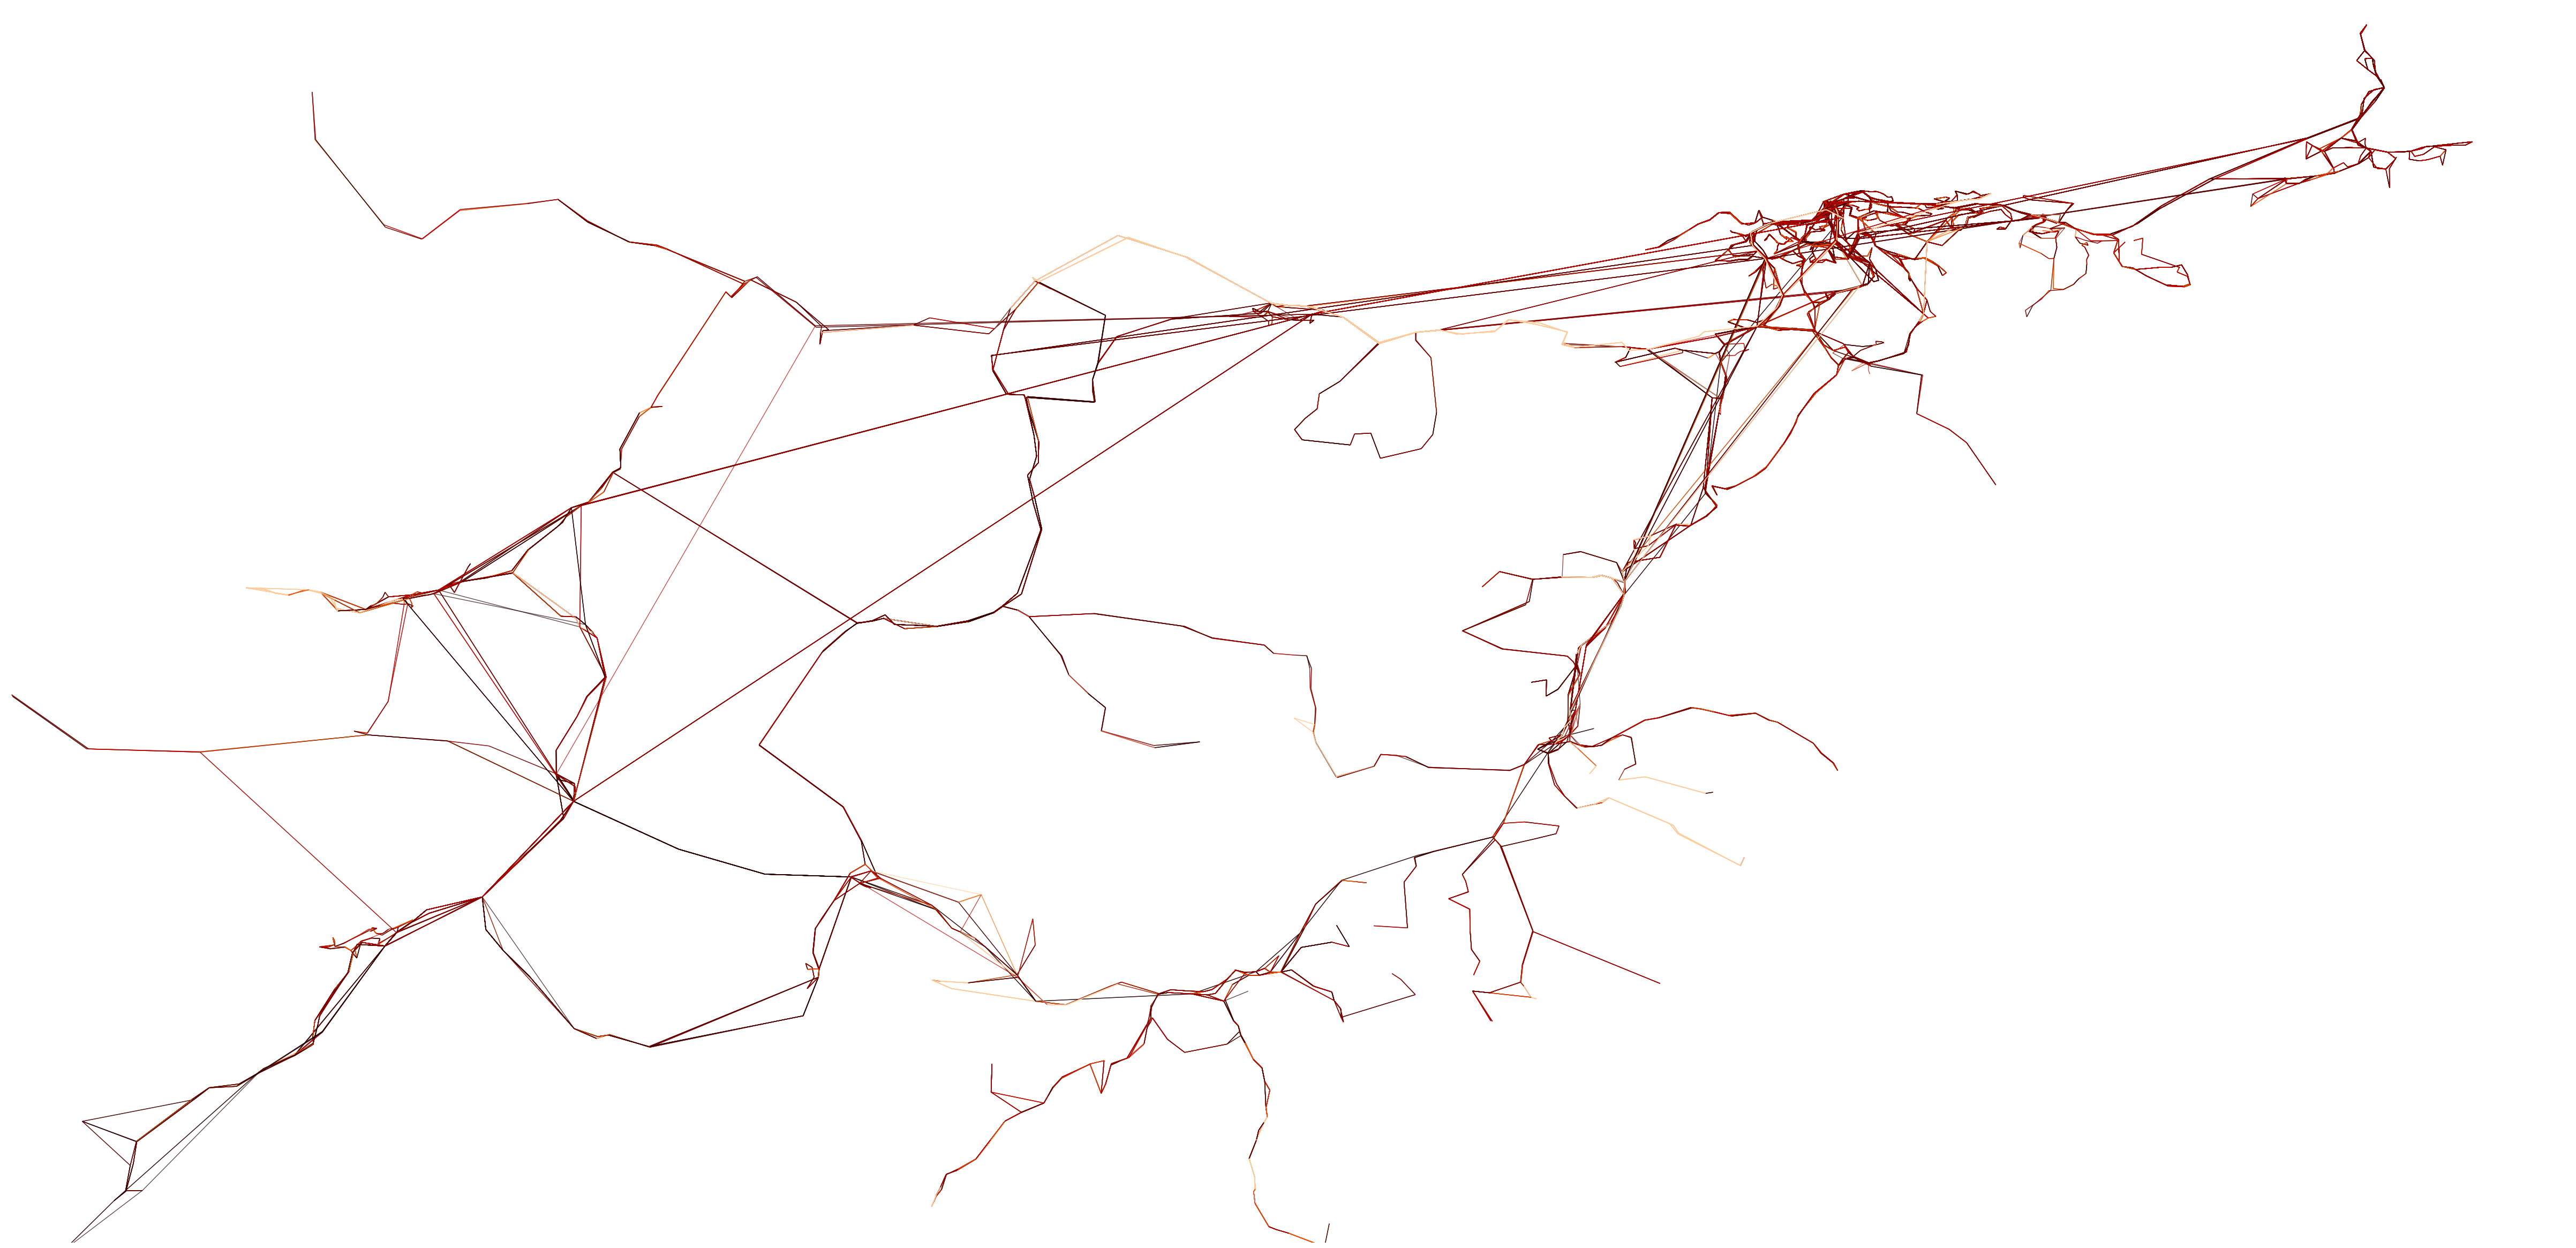

(<Figure size 6181.23x3000 with 1 Axes>, <Axes: >)

In [ ]:
# edgecolor = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
# ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
#                  edges=urbanaccess_net.net_edges[urbanaccess_net.net_edges['net_type']=='transit'],
#                  bbox=bbox,
#                  fig_height=30, margin=0.02,
#                  edge_color=edgecolor, edge_linewidth=1, edge_alpha=0.7,
#                  node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

# Using the UrbanAccess network with Pandana

In [ ]:
# urbanaccess_net.net_nodes.dtypes

id           object
x           float64
y           float64
net_type     object
dtype: object

In [ ]:
# urbanaccess_net.net_edges.dtypes

weight              float64
unique_agency_id     object
unique_trip_id       object
sequence            float64
edge_id              object
route_type          float64
unique_route_id      object
net_type             object
from                 object
to                   object
distance            float64
name                 object
ref                  object
highway              object
service              object
bridge               object
tunnel               object
access               object
oneway               object
toll                 object
lanes                object
maxspeed             object
hgv                  object
area                 object
width                object
junction             object
mean                float64
node_id_route        object
from_int              int64
to_int                int64
dtype: object

# Create and save

In [ ]:
s_time = time.time()
transit_ped_net = pdna.network.Network(urbanaccess_net.net_nodes["x"],
                               urbanaccess_net.net_nodes["y"],
                               urbanaccess_net.net_edges["from_int"],
                               urbanaccess_net.net_edges["to_int"],
                               urbanaccess_net.net_edges[["weight"]],
                               twoway=False)
print('Took {:,.2f} seconds'.format(time.time() - s_time))

Took 53.26 seconds


In [ ]:
transit_ped_net.save_hdf5('/content/drive/MyDrive/CS Gipuzkoa/Data/transit_net_01.h5')